### Multiple_Linear_Regression_Bike_Sharing_Assignment

### Submitted by `MUNA SAHU`

### Assignment Problem Statement
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the ayment information, and the system unlocks it. This bike can then be returned to another ock belonging to the same system.
-  US bike-sharing provider BoomBikes has recently suffered considerable dips in their evenues due to the ongoing Corona pandemic. The company is finding it very difficult to ustain in the current market scenario. So, it has decided to come up with a mindful business lan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, nd the economy restores to a healthy state.

#### The Company wants to know
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal:
- You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [124]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [125]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score

### Step1: Data loading  and understanding the Data

In [126]:
# importing dataset 
bike_data= pd.read_csv("day.csv")

In [127]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [128]:
bike_data.shape

(730, 16)

In [129]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [130]:
# Cehecking for nul Values entries
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [131]:
# Viewing all columns
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Insights :

- The `Data Set` has `730` rowns and `16` columns.
- Except `'dteday'` whose dtype is object (contains date type info), all other are either `float` or `integer` type.
- `0` null/missing values found in the dataset
- Some columns that are `categorical` in nature, but in `integer/float type`.

##### Categorycal Columns are `["season","weathersit", "mnth", "weekday"]`

### Step2: Preprocessing 

#### 2.1. Dropping Un-necessary or Non-Relevant columns for our analysis

In [132]:
# instant columns contains index values only, not requried
bike_data.drop(['instant'],axis=1,inplace=True)

In [133]:
# we already have yr and month columns, so dteday in not required
bike_data.drop(['dteday'],axis=1,inplace=True)

In [134]:
# the casual & registered coluns are not relevant to our analysis.
bike_data.drop(['casual','registered'],axis=1,inplace=True)

In [135]:
# Looking the data set after the cchanges
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### 2.2. Mapping values of categorical columns with Actual Values for better understanding

In [136]:
# replacement on season column
bike_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
# replacement on weathersit column 
bike_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
# replacement on mnth column
bike_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
# replacement on weekday column
bike_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
# Checking the changes
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### 2.3. Dummy Variable creations for categorycal columns

In [137]:
data_BFD = bike_data #Before Dummy Variable Creation
bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])

In [138]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

### Step3: EDA and Visualising the Data

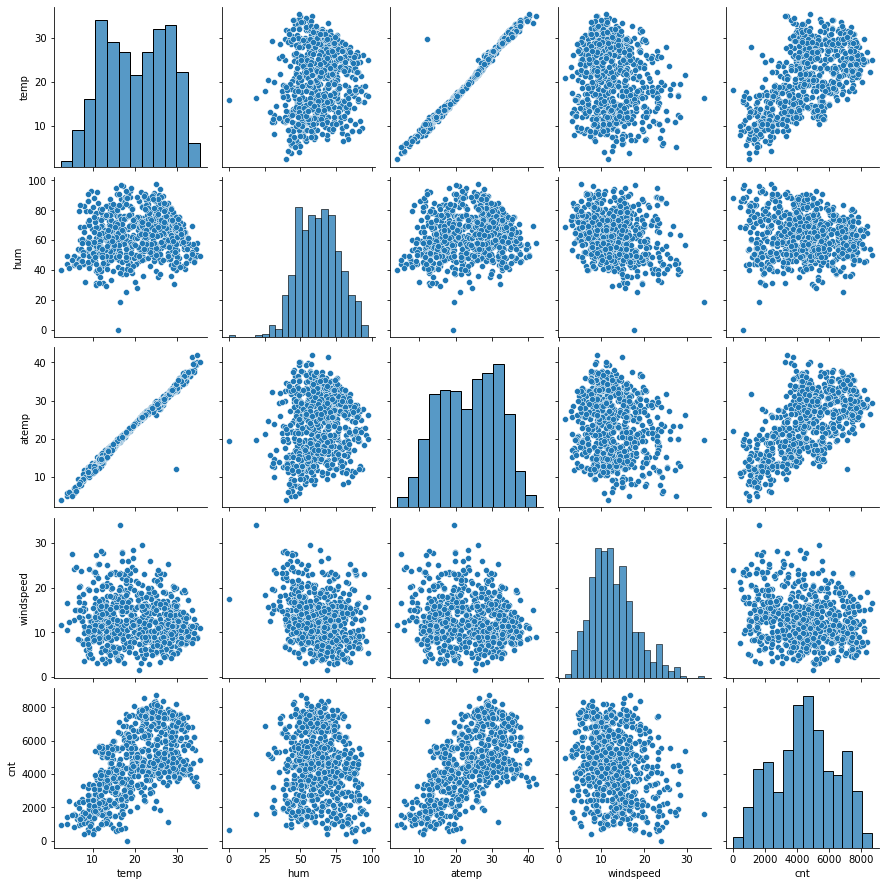

In [139]:
# Checking relationship between numerical columns
sns.pairplot(data=bike_data, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

**Insights:**

- *The correlation between `temp` and `atemp` is linear.*
- *A positive linear trend exists between `temp-cnt` and `atemp-cnt`*

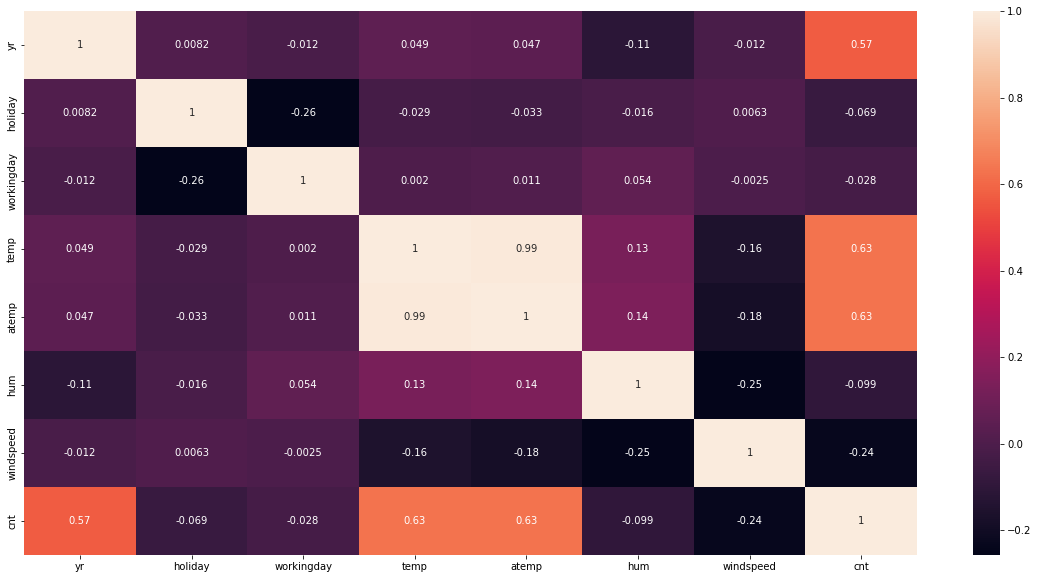

In [140]:
# Analyzing the correlation between continuous variables.
plt.figure(figsize = (20, 10))
sns.heatmap(bike_data[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

**Insights:**

- *A correlation of `0.63` exists between cnt and atemp.*
- *A correlation of `0.63` exists between cnt and temp.*
- *A correlation of `0.99` exists between temp and atemp.*
- *We also notice that the Target variable is linearly related to certain of the independent variables. It is a positive indicator for developing a linear regression model.*
- *temp and atemp are highly correlated; we can delete one of them, but let's keep both for further testing.*

#### Univariate Analysis

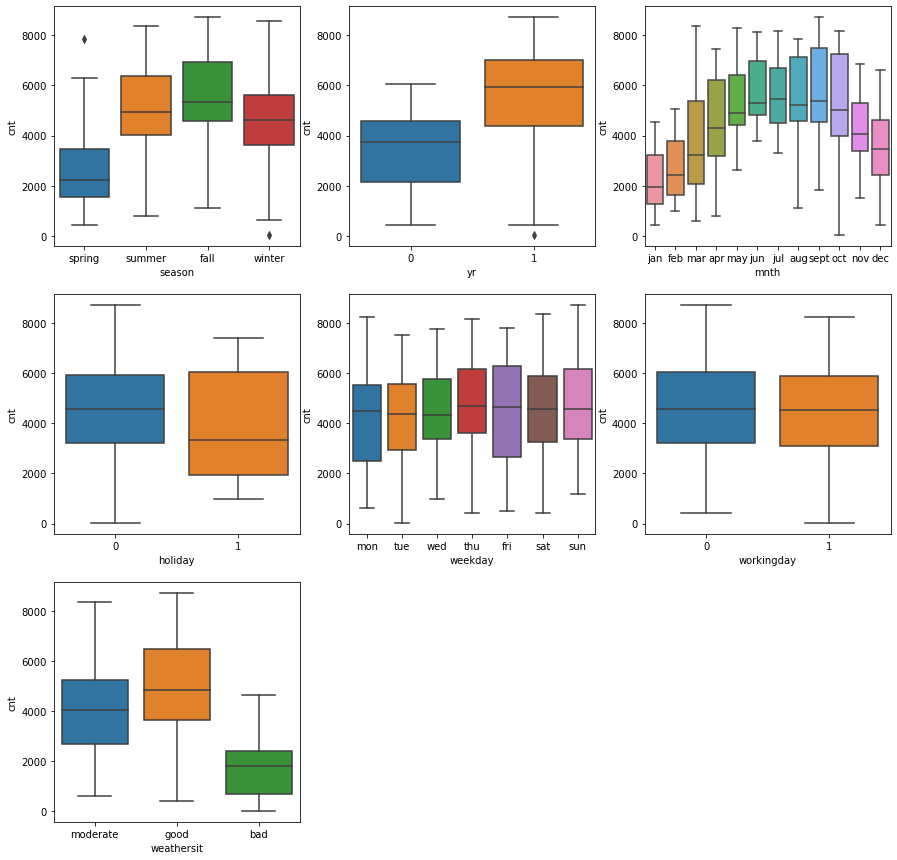

In [141]:
# Boxplot for categorical features to see demands
cat_features  = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=data_BFD, x=i[1], y='cnt')
plt.show()

**Insights:**

       Here, one can get several insights from the plots.
    1. Season 3 or fall has the strongest demand for bike rentals.
    2. I've seen that demand for next year has increased.
    3. Demand keeps rising month by month till June. September month has the highest demand for rental bikes. After September, demand is falling.
    4. During holidays, there is a decline in demand.
    5. The weekday does not provide a good picture of demand.
    6. Clear weathershit is the most in-demand.
    7. During September, bike sharing is greater. It is lower towards the end and beginning of the year, perhaps owing to extreme weather conditions.

#### Bi-Variate Analysis

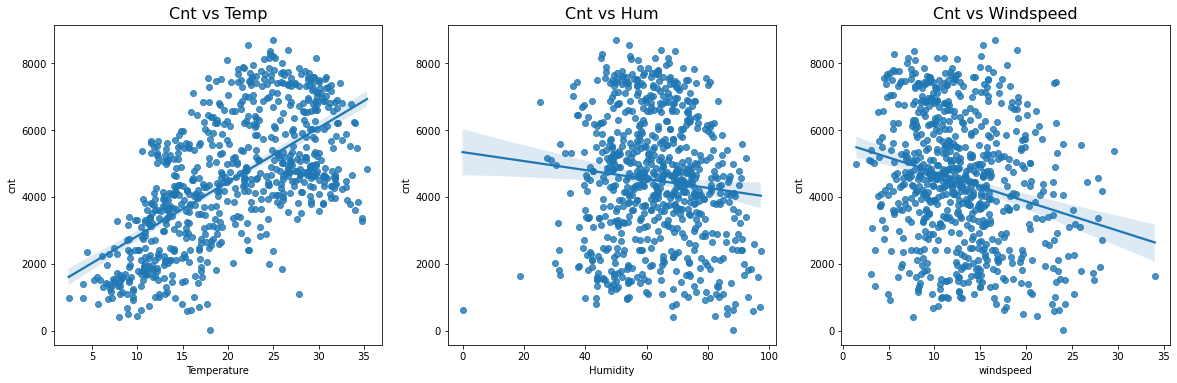

In [142]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=data_BFD,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.subplot(3,3,2)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=data_BFD,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.subplot(3,3,3)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=data_BFD,y="cnt",x="windspeed")
plt.show()

__Insights:__

        1. temp is strongly correlated with bike demand.
        2. We could see that cnt raises linearly with temp, revealing a linear correlation.
        3. The hum is values are more widespread.
        4. Regardless of the fact that cnt drops when the relative hum rises.
        5. The windspeed values are more scattered.
        6. Although we see a decline in cnt when windspeed increases.

### Step4: Splitting the Data into Training and Testing Sets

In [143]:
# Train Test divided with a ratio of 80:20.
bike_train, bike_test= train_test_split(bike_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [144]:
# Checking the size & shape of the tarin and test data
print(bike_train.shape)
print(bike_test.shape)

(584, 31)
(146, 31)


### Step5: Missing Value Imputation

In [145]:
bike_train.isnull().sum()

yr                     0
holiday                0
workingday             0
temp                   0
atemp                  0
hum                    0
windspeed              0
cnt                    0
season_spring          0
season_summer          0
season_winter          0
mnth_aug               0
mnth_dec               0
mnth_feb               0
mnth_jan               0
mnth_jul               0
mnth_jun               0
mnth_mar               0
mnth_may               0
mnth_nov               0
mnth_oct               0
mnth_sept              0
weekday_mon            0
weekday_sat            0
weekday_sun            0
weekday_thu            0
weekday_tue            0
weekday_wed            0
weathersit_bad         0
weathersit_good        0
weathersit_moderate    0
dtype: int64

- As we can see there is no missing values in our train data so need of missing value imputation.
- we are just skipping the mention step

### Step6: Rescaling the Features 

**To make all features in same scale to interpret easily**

**Following columns are continous to be scaled**
`temp,hum,windspeed`

In [146]:
# scalling continuous features
cont_features = ['temp','atemp','hum','windspeed']
# using minmax scaler to scale the values
scaler = MinMaxScaler()
# Applying scaler() to all the contineous features
bike_train[cont_features] = scaler.fit_transform(bike_train[cont_features])

In [147]:
# stats from Training set after scaling
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.513175,0.649499,0.319463,4505.267123,0.251712,0.246575,0.250000,0.090753,0.087329,0.073630,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.027397,0.630137,0.342466
std,0.500241,0.163378,0.446377,0.225336,0.211663,0.144219,0.168114,1958.617712,0.434369,0.431387,0.433384,0.287504,0.282558,0.261392,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.163378,0.483181,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,3070.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,4566.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,6035.750000,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step7: Feature Selection

In [148]:
# X holds the remaining variables as well as our independent variables.
X_train = bike_train
# y only hold the target variable.
y_train = bike_train.pop('cnt')

In [149]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [150]:
y_train.head()

367    2236
648    7570
44     1913
705    5008
379    2311
Name: cnt, dtype: int64

### 7.1. Building a Model using RFE and Automated approach
#### Using `RFE` to eliminate some columns

In [151]:
# Building of a Linear Regression model with SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [152]:
# Eliminating features to 15 using automated approach
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [153]:
# RFE selected columns and their weights in the automatic method.
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 10),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [154]:
# Looking at the columns suggested bt RFE
rfe_col=X_train.columns[rfe.support_]
print(rfe_col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')


In [155]:
# Coluns skipped by the RFE
print(X_train.columns[~rfe.support_])

Index(['workingday', 'atemp', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')


### 7.2 Manual elimination

**model building using statsmodel.api**

In [156]:
#Function to develop a model using the statsmodel.api - Takes as an argument those columns to be chosen for the model.
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [157]:
#Function to compute and display VIFs - Takes as a parameter the columns for which VIFs are to be calculated.
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### 7.2.1 Model 1 - Start with all variables selected by RFE

In [158]:
build_model(rfe_col)
get_vif(rfe_col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.71e-221
Time:                        22:58:10   Log-Likelihood:                -4706.8
No. Observations:                 584   AIC:                             9444.
Df Residuals:                     569   BIC:                             9509.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1718.9578    

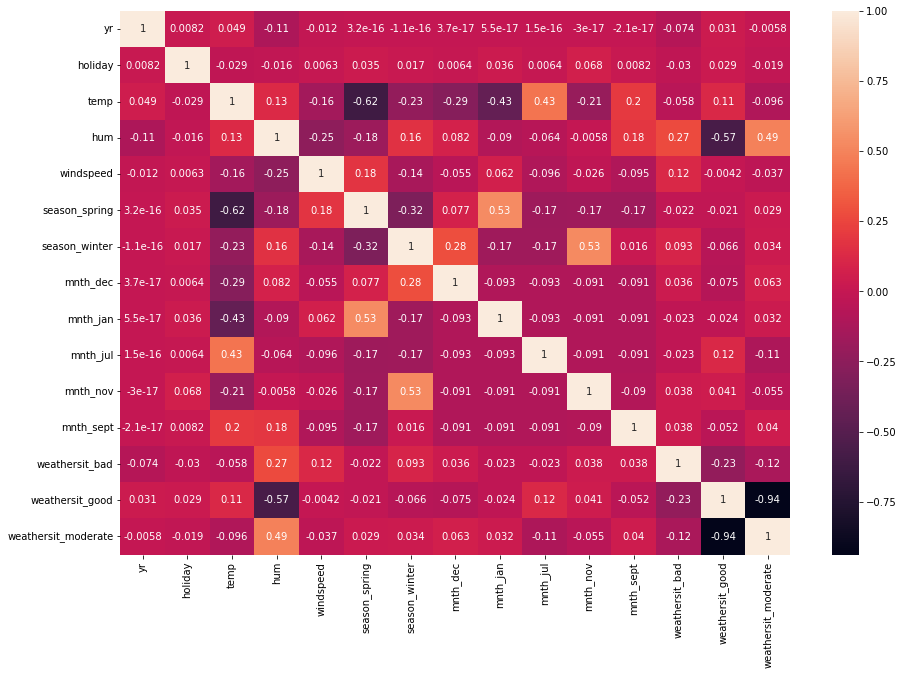

In [159]:
# Checking the correlation between the RFE-selected features and the target variable.
# Also to assess the impact of various features on the target variable.
plt.figure(figsize = (15,10))
sns.heatmap(bike_data[rfe_col].corr(), annot=True)
plt.show()

* as we can see from the statmodel summary the features selected by the RFE model all are less p value than 0.05 so we have to remove the features one by one according to their VIF
- As we can see `weathersit_good` has the highest VIF we have to drop it.
<hr>

#### Model 2: After Removing `weathersit_good`

In [160]:
# The feature mnth_jan has a negative coefficient and is statistically insignificant due to its high p-value.
features = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jan',
            'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.71e-221
Time:                        22:58:11   Log-Likelihood:                -4706.8
No. Observations:                 584   AIC:                             9444.
Df Residuals:                     569   BIC:                             9509.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3193.8111    

- we can see than after removing the `weathersit_good` the `weathersit_moderate` vif value decreased.
- Decided to drop 'hum' due to high VIF.
- Keeping 'temp' as temperature could be an important factor for a business like bike rentals. We will check this further
<hr>

#### Model 3: After removing `hum`

In [161]:
# Decided to drop 'hum' due to high VIF.
features = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jan',
            'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     234.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.05e-218
Time:                        22:58:11   Log-Likelihood:                -4715.5
No. Observations:                 584   AIC:                             9459.
Df Residuals:                     570   BIC:                             9520.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2517.4850    

- Decided to drop `holiday` due to llightest significant in our model 
<hr>

#### Model 4: After removing `holiday`

In [162]:
# Decided to drop 'holiday' due to high VIF.
features = ['yr','temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jan',
            'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     246.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.38e-216
Time:                        22:58:11   Log-Likelihood:                -4723.4
No. Observations:                 584   AIC:                             9473.
Df Residuals:                     571   BIC:                             9530.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2535.8768    

- the Adjusted R2 and R2 values are not changed so we have go further feature reduction to make a good model
- The `holiday` has less imapct on our model so we have to delete this also
<hr>

#### Model 5: After removing `holiday`

In [163]:
features = ['yr', 'temp', 'windspeed', 'season_spring','season_winter', 'mnth_dec',
            'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad','weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     263.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.80e-215
Time:                        22:58:11   Log-Likelihood:                -4728.9
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     572   BIC:                             9534.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2344.7727    

- As we can see there is no significant chanchange in  the R2 and Adjusted R2 we can state that the fatures selected for previous model are not more independent.
- here we can remove the `temp` feature as it has the highest VIF at our end.

<hr>

#### Model 6: after removing `temp`

In [164]:
features = ['yr', 'windspeed', 'season_spring','season_winter', 'mnth_dec',
            'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad','weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.00e-177
Time:                        22:58:11   Log-Likelihood:                -4821.4
No. Observations:                 584   AIC:                             9665.
Df Residuals:                     573   BIC:                             9713.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4959.9773    

- As we can see there is significant chanchange in  the R2 and Adjusted R2 after removing `temp` we can state that the fature `temp` ffeature is not that feature we can remove from our model.
- here we can remove the `windspeed` feature as it had the 2nd highest VIF in our model.

<hr>

#### Model 7: after removing `windspeed`

In [165]:
features = ['yr', 'temp', 'season_spring','season_winter', 'mnth_dec',
            'mnth_jul', 'mnth_nov', 'mnth_sept', 'weathersit_bad','weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     269.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.93e-209
Time:                        22:58:11   Log-Likelihood:                -4746.7
No. Observations:                 584   AIC:                             9515.
Df Residuals:                     573   BIC:                             9563.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1828.6918    

- As we can see that after removing the `windspeed` there is no such changes in R@ and Adj. R-squared as happend due to removing the `temp` feature.
- Our model still have some depenednt features and all the VIF are less than 5 so I am randomly decide to remove `mnth_nov`

<hr>

#### Model 8: after removing `mnth_nov`

In [166]:
features = ['yr', 'temp', 'season_spring','season_winter', 'mnth_dec',
            'mnth_jul', 'mnth_sept', 'weathersit_bad','weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     291.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.03e-207
Time:                        22:58:11   Log-Likelihood:                -4753.7
No. Observations:                 584   AIC:                             9527.
Df Residuals:                     574   BIC:                             9571.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1673.6042    

- Our model still have some depenednt features and all the VIF are less than 5 so I am randomly decide to remove `season_winter`. Because we can see that there is no significant change in **R-squared** and **Adj. R-squared**. So we have to go on.
<hr>

#### Model 9: after removing `season_winter`

In [167]:
features = ['yr', 'temp', 'season_spring','mnth_dec','mnth_jul', 'mnth_sept', 'weathersit_bad','weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     310.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.48e-203
Time:                        22:58:11   Log-Likelihood:                -4766.6
No. Observations:                 584   AIC:                             9551.
Df Residuals:                     575   BIC:                             9590.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2233.7298    

- Our model still have some depenednt features and all the VIF are less than 5 so I am randomly decide to remove `mnth_dec`. Because we can see that there is no significant change in **R-squared** and **Adj. R-squared**. So we have to go on.
<hr>

#### Model 10: after removing `mnth_dec`

In [168]:
features = ['yr', 'temp', 'season_spring','mnth_jul', 'mnth_sept', 'weathersit_bad','weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     355.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.06e-204
Time:                        22:58:11   Log-Likelihood:                -4766.7
No. Observations:                 584   AIC:                             9549.
Df Residuals:                     576   BIC:                             9584.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2205.8163    

- Our model still have some depenednt features and all the VIF are less than 5 so I am randomly decide to remove `mnth_sept`. Because we can see that there is no significant change in **R-squared** and **Adj. R-squared**. So we have to go on.
<hr>

#### Model 11: after removing `mnth_sept`

In [169]:
features = ['yr', 'temp', 'season_spring','mnth_jul', 'weathersit_bad','weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     404.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          5.14e-203
Time:                        22:58:11   Log-Likelihood:                -4773.1
No. Observations:                 584   AIC:                             9560.
Df Residuals:                     577   BIC:                             9591.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2165.1432    

- Our model still have some depenednt features and all the VIF are less than 5 so I am randomly decide to remove `mnth_jul`. Because we can see that there is no significant change in **R-squared** and **Adj. R-squared**. So we have to go on.
<hr>

#### Model 12: after removing `mnth_jul`

In [170]:
features = ['yr', 'temp', 'season_spring', 'weathersit_bad','weathersit_moderate']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     462.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.19e-199
Time:                        22:58:11   Log-Likelihood:                -4784.7
No. Observations:                 584   AIC:                             9581.
Df Residuals:                     578   BIC:                             9608.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2340.8606    

### Step8: Model Building  
##### Final model is Model 12

#### `_Inference`_
- Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is  0.80 & Adj. R-squared is 0.798. Both R2 and & Adj. R-squared are nearly equal so Let us select **model 12**  as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
- Difference between R-squared and Adjusted R-squared values for **model 12** is veryless, which also means that there are no additional parameters that can be removed from that model. So the final model is the model is **Model 12**

In [171]:
# Building the finalmodel using sklearn
features = ['yr', 'temp', 'season_spring', 'weathersit_bad','weathersit_moderate']
lr1 = LinearRegression()
lr = lr1.fit(X_train[features],y_train)
print(lr.intercept_,lr.coef_)

2340.8605509011213 [ 2019.54713064  3315.77169329 -1490.76224724 -2537.35909602
  -613.83027106]


### Step9: Model Evaluation 
##### Residual Analysis of the train data

In [172]:
y_train_pred = lr.predict(X_train[features])

Text(0.5, 0, 'Errors')

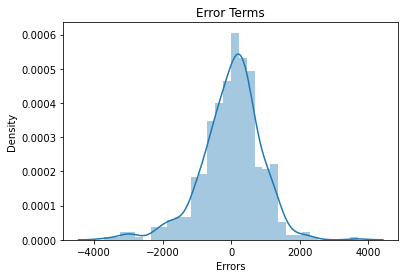

In [173]:
# Plot the histogram of the error terms
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

- **Here, errors are normally distributed with a mean of 0. So everything seems to be fine**

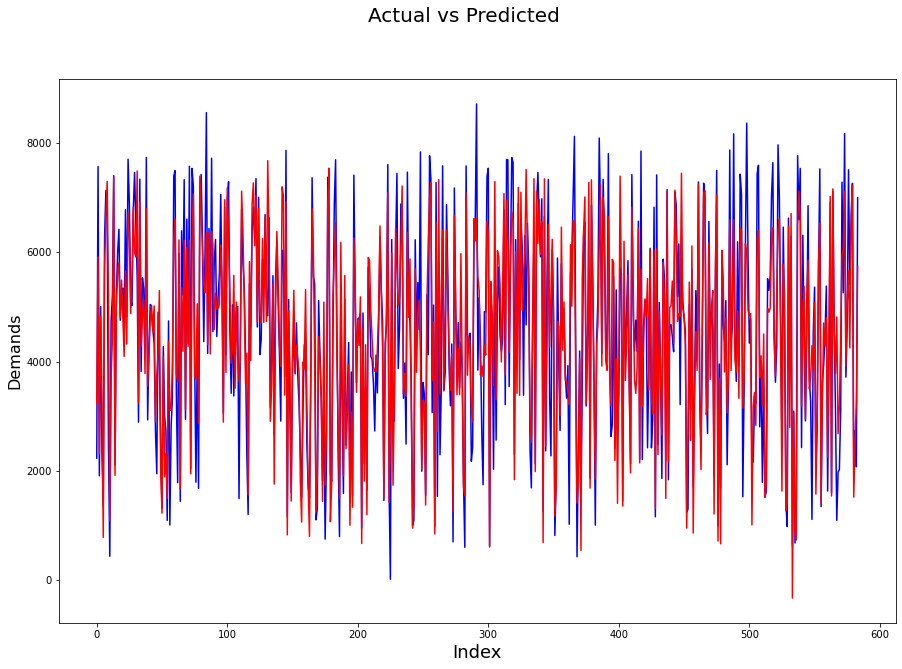

In [174]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize = (15,10))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Demands', fontsize=16)                               # Y-label
plt.show()

#### Actual and predicted results follow an essentially same pattern, therefore this model seems to be one good model.

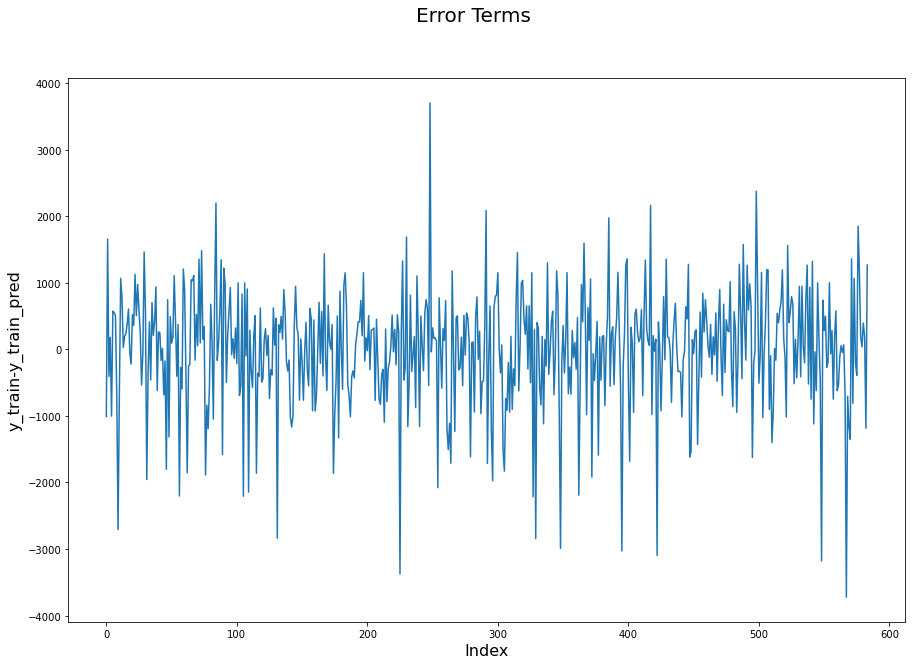

In [175]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize = (15,10))
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Index', fontsize=16)                  # X-label
plt.ylabel('y_train-y_train_pred', fontsize=16)   # Y-label
plt.show()

In [176]:
# Printing R-squared Value
r2=r2_score(y_train,y_train_pred)
r2

0.8001310035901144

**We can See that the R-squared value is same**
<hr>

#### Linearity Check

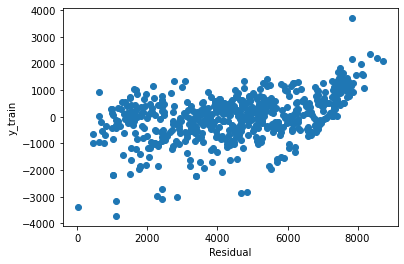

In [177]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Predict values for test data set

In [178]:
# scalling continuous features
cont_features = ['temp','atemp','hum','windspeed']
# using minmax scaler to scale the values
# Applying scaler() to all the contineous features in the test data
bike_test[cont_features] = scaler.fit_transform(bike_test[cont_features])

In [179]:
# n is number of rows in X
n = bike_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = bike_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7457806624611103

In [180]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
features = ['yr', 'temp', 'season_spring', 'weathersit_bad','weathersit_moderate']
# X holds the remaining variables as well as our independent variables.
X_test = bike_test
# y only hold the target variable.
y_test = bike_test.pop('cnt')
X_test_sm = sm.add_constant(X_test[features])
lm = sm.OLS(y_test, X_test_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     115.6
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           6.44e-48
Time:                        22:58:12   Log-Likelihood:                -1185.6
No. Observations:                 146   AIC:                             2383.
Df Residuals:                     140   BIC:                             2401.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2775.8330    

### Final model equation

cnt = 2340.8606 + (yr × 2019.5471) + (temp × 3315.7717) − (weathersit_bad × 2537.3591) + (season_spring × 1490.7622) - (weathersit_moderate × 647.9997)

#### All predictor variables:

- yr

- temp

- weathersit_bad

- season_spring

- weathersit_moderate

#### NOTE:
- yr : year
- temp : temperature
- weathersit_bad: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- season_spring: spring
- weathersit_moderate: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist






### Top 3 most important predictor variables: 

- Temperature (temp) - A coefficient value of `‘3315.7717’` indicated that a unit increase in temp variable increases the bike hire numbers by `‘3315.7717’` units.

- Year (yr) - A coefficient value of `‘2019.5471’` indicated that a unit increase in yr variable increases the bike hire numbers by `‘2019.5471’` units.

- Weather Situation 3 (weathersit_bad) - A coefficient value of `‘-2537.3591’` indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by `‘-2537.3591’` units.

In [184]:
# Eliminating features to 15 using automated approach
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X_train,y_train)
print(X_train.columns[rfe.support_])

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'mnth_jul', 'weathersit_bad'],
      dtype='object')


In [186]:
features = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'mnth_jul', 'weathersit_bad']
build_model(features)
get_vif(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     328.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.42e-196
Time:                        23:11:50   Log-Likelihood:                -4785.1
No. Observations:                 584   AIC:                             9586.
Df Residuals:                     576   BIC:                             9621.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2312.7222    163.414     14.

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during Spring.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little as this is when business would be at its best.